## Step 1. 스티커 구하기 or 만들기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import dlib
print("💞")

💞


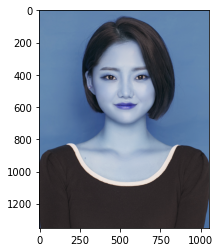

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/colour.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()

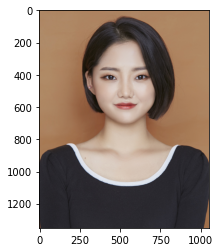

In [3]:
#색깔 보정처리

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [4]:
# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [5]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(332, 290) (718, 675)]]


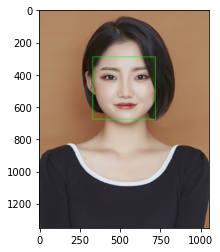

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


랜드마크의 갯수는 68개

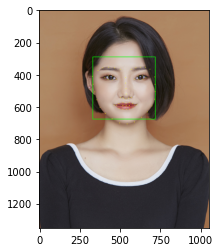

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

랜드마크 표시가 작아서 잘 안보이지만...!
자세히 들여다 보면 랜드마크 표시가 있답니다.

## Step 4. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [10]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


(538, 520)
(x,y) : (538,327)
(w,h) : (387,387)


In [11]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,327)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/sticker/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(387, 387, 3)


y 값이 음수가 나온 이유는? 스티커의 시작점이 얼굴 사진 영역을 벗어났기 때문이다!
음수에 대한 예외처리가 필요함. 원본 이미지의 범위를 벗어난 스티커 부분은 제거해줘야한다

In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,327)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


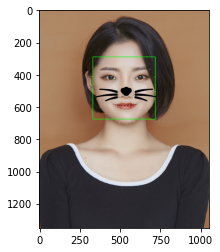

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

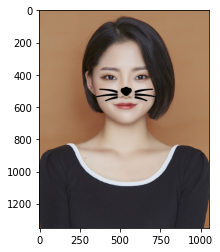

In [16]:
# bounding box와 landmark를 제거하고 최종결과만 출력하기

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

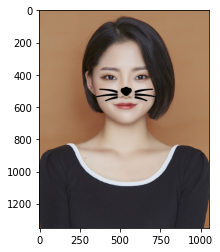

In [17]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

# 옆에서 찍은 사진에 적용해보기

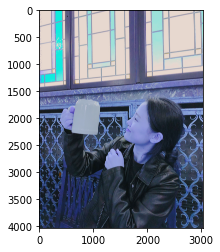

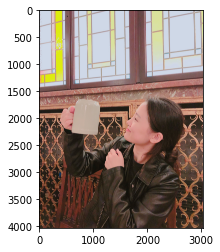

In [18]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/aaa.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()


#색깔 보정처리

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")


🌫🛸


🌫🛸
rectangles[]


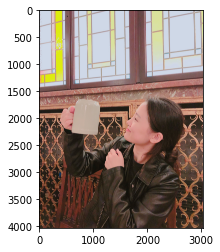

In [20]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 옆으로 찍은 사진은 얼굴의 bounding box를 추출하는 구간부터 문제가 발생한다. 

### 종료

# 얼굴이 다 나온 측면 + 소품

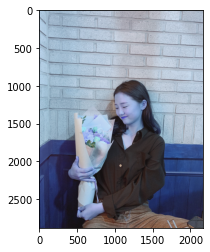

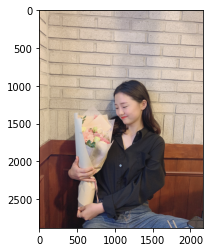

🌫🛸


In [21]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/bbb.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()


#색깔 보정처리

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")


🌫🛸
rectangles[[(954, 1169) (1275, 1490)], [(502, 1530) (964, 1992)]]


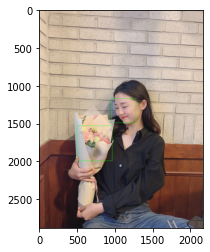

In [22]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 완전히 얼굴의 측면만 보였던 첫번째 사진과는 달리, 이목구비가 다 보이는 이번 사진의 경우에는 bounding box가 추출되었다. 하지만, 꽃다발을 얼굴로 인식했는지 꽃다발에서도 bounding box가 추출되었다...

rectangles[[(954, 1169) (1275, 1490)], [(502, 1530) (964, 1992)]]


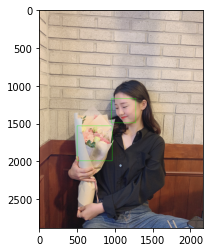

In [23]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 두 개의 box가 형성되었기 때문에 rectangles의 값도 두 개가 나왔다. 

In [24]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [25]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


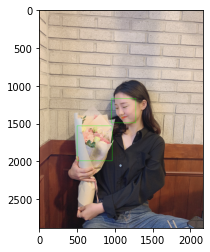

In [26]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

사진 속의 얼굴이 너~무 작은 탓에 랜드마크를 확인하기 어렵다...
꽃다발도...

### 좌표 확인

In [27]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


(1057, 1369)
(x,y) : (1057,1208)
(w,h) : (322,322)
(762, 1756)
(x,y) : (762,1525)
(w,h) : (463,463)


 두 개의 박스에 각각 스티커를 적용해야하는 상황이 발생했다. 
 

# 선글라스+ 마스크

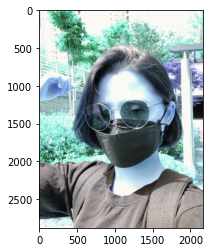

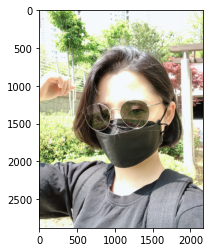

In [28]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/sunglasses.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()

#색깔 보정처리

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()



🌫🛸
🌫🛸
rectangles[[(617, 937) (1575, 1895)]]


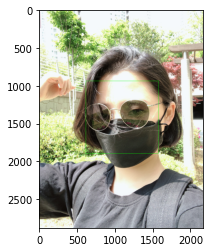

In [29]:
# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")


# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

예상 외로 마스크에 선글라스를 착용했는데도 bounding box를 추출했다. 
왜일까..?

In [30]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [31]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


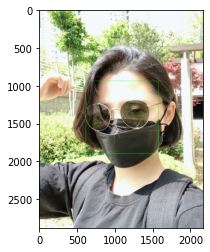

In [32]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [33]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


(1033, 1535)
(x,y) : (1033,1056)
(w,h) : (959,959)


In [34]:
refined_x = x - w // 2
refined_y = y + 100
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (554,1156)


In [35]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/sticker/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(959, 959, 3)


In [36]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (554,1156)


In [37]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


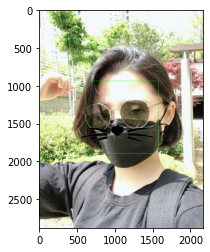

In [38]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

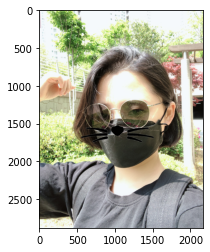

In [39]:
# bounding box와 landmark를 제거하고 최종결과만 출력하기

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 결과 : ? 의외로 선글라스와 마스크를 착용한 상태에서 얼굴을 인식하고 스티커를 부착할 수 있었다. 

## 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

## 회고 

1. 고양이 수염 스티커 위치를 이동시키는 구간이 너무 복잡하고 어려웠다. 특히 구글링을 해도 이 부분에 대한 설명을 쉽게 찾을 수 없었다. 다행히 다른 아이펠 교육생분께 도움을 얻을 수 있었다.
 +) x값은 코를 기준으로 적절한 위치에 있었지만, y값은 위치해야할 코보다 더 높은 곳에 있었다. 해당  y 값에서 음수가 되면 위치가 더욱 위로 가고, 더 높은 양수값을 갖게 되면 위치가 아래로 내려간다. 적절한 숫자를 여러 번 더해 본 결과, 코에 위치할 수 있었다. 



2. '선글라스&마스크'는 얼굴이 추출되었지만, '얼굴의 일부만 나온 측면사진'에서는 추출이 되지 않았다. 반투명한 선글라스를 통해서 얼굴을 인식한 것 같다. 이 부분을 통해서 얼굴 외곽선과 눈이 중요하다고 생각되었다.선글라스와 마스크는 많이 가려져 있기 때문에 인식하기 힘들 



3. 얼굴 각도에 따라서 스티커 또한 기울어진 모양으로 바꿔야 할 것이다.



4. 멀리서 촬영하거나 옆으로 누워서 촬영하면 발생할 수 있는 문제? 
- 멀리서 촬영한 사진은 랜드마크가 너무 작게 보이기도 하고 화질이 좋지 않다면, 68개의 랜드마크가 각각 다른 좌표에 위치할 수 없을 것이다. 중복되는 구간이 발생할 것이라고 예상된다. 
- 옆으로 누워서 촬영한다면? 
 (1) 얼굴의 형태와 이목구비(특히 눈)이 보이는 경우는 인식이 될 것이다.
 (2) 위의 항목들 중 이목구비의 일부가 보이지 않거나 얼굴 외형을 인식할 수 없다면  bounding box의 형성이 안될 것이다.


5. 대부분의 사진 앱을 사용할 때, 사용자가 증명사진을 찍는 것처럼 가만히 있는 경우가 없다. 얼굴을 계속 움직이기 때문에 그 속도에 맞춰서 각도나 크기를 조절할 수 있어야 한다. 그렇지 않으면... 사용자가 없을 것이다.  

6. 스티커 앱을 만들 때 정확도는 90% 이상이 되어야 하지 않을까? 
스티커의 속도가 어느 정도 느리거나 화질이 나쁜 것은 사람들이 이해할 수 있겠지만, 사진을 꾸미기 위해서 적절한 위치에 스티커가 자리잡아야 하기 때문에, 정확도가 중요하다고 생각한다. 


7. 루브릭 평가 지표를 맞추기 위해서 다양한 사진을 이용했다. 
- 구상 전에 다양한 종류의 사진을 찾으면서, '선글라스&마스크'의 사진은 인식하지 못하지만, '안경'은 인식할 수 있을 것이라는 생각을 하고 준비했다. 하지만 예상 밖으로 선글라스와 마스크를 착용한 사진에서 bounding box가 형성되어 스티커를 부착할 수 있게 되면서 landmark를 잡고, bounding box를 형성하는데 가장 중요한 요인이 무엇일 지 의문이 들었다. 
- 꽃다발과 함께 있는 사진은 꽃다발이 인식될 것이라는 생각을 전혀 못했다... 가끔 스티커 앱을 사용할 때, 사람의 이목구비와 닮은 인형이나 조형물을 사람의 얼굴로 인식하는 경우는 보았다. 하지만, 꽃다발은 예상하지 못했던 장애물이었다. 어떻게 해야 꽃다발을 사람의 얼굴로 인식하지 못하게 할 수 있을까? 아니면 여러 bounding box가 생긴 후에 또 한번의 landmark 과정으로 진짜 얼굴을 다시 찾게 해야할까?

8. 위의 꽃다발&얼굴이 있는 사진의 경우, (x,y)를 (x1,y1)와 (x2,y2)로 나누어서 사람의 얼굴에만 스티커를 부착하는 방법을 시도해보고 싶었으나, 다음으로 미루게 되었다. 만약 그렇게 한다면 7번에서의 의문이 해결되어야 할 것 같다...

9. 포기하지 않고 끝까지 완수하는게 중요하다는 생각이 들었다. 다른 사람들과의 협업을 통해서 더욱 원활하게 공부를 할 수 있었다. 내가 아는 것이 거의 없기 때문에 lms에서 나오는 모든 단어와 숫자, 내용에 집착하다보니 진도는 밀리고 흥미와 자신감을 잃고 있었다. 조금만 더 구글링을 하면 내가 찾아낼 수 있을 거라는 생각에 팀원들에게 질문하기 어려웠다. 하지만 오늘 용기내어 질문을 했고 lms와 개발에 대해 가지면 좋을 태도를 조언받을 수 있었다. 감사합니다. 